# Workflow

In [56]:
import grandpy as gp

sars = gp.read_grand("https://zenodo.org/record/5834034/files/sars.tsv.gz", design=("Condition", "dur.4sU", "Replicate"), classification_genes_label="viral")

Detected URL -> downloading to temp file
Detected dense format -> using dense reader
Temporary file sars.tsv.gz was deleted after loading.


C:\Users\finn3\PycharmProjects\grandpy\grandpy\utils.py:246: UserWarning: 17 Duplicates found: STPG4, PDE11A, TXNRD3NB, ARL14EPL, HIST1H3D (first 5); they have been renamed to ensure uniqueness (e.g., MATR3 → MATR3_1).
  warnings.warn(f"{len(duplicates_list)} Duplicates found: {', '.join(duplicates_list[:5])} (first 5); they have been renamed to ensure uniqueness (e.g., MATR3 → MATR3_1).")


In [59]:
sars.coldata

,Name,Condition,duration.4sU,duration.4sU.original,Replicate,no4sU
Name,,,,,,
Mock.no4sU.A,Mock.no4sU.A,Mock,0.0,no4sU,A,True
Mock.1h.A,Mock.1h.A,Mock,1.0,1h,A,False
Mock.2h.A,Mock.2h.A,Mock,2.0,2h,A,False
Mock.2h.B,Mock.2h.B,Mock,2.0,2h,B,False
Mock.3h.A,Mock.3h.A,Mock,3.0,3h,A,False
Mock.4h.A,Mock.4h.A,Mock,4.0,4h,A,False
SARS.no4sU.A,SARS.no4sU.A,SARS,0.0,no4sU,A,True
SARS.1h.A,SARS.1h.A,SARS,1.0,1h,A,False
SARS.2h.A,SARS.2h.A,SARS,2.0,2h,A,False


In [60]:
sars.gene_info

,Symbol,Gene,Length,Type
Symbol,,,,
UHMK1,UHMK1,ENSG00000152332,8478,Cellular
PABPC4,PABPC4,ENSG00000090621,3592,Cellular
CDC42,CDC42,ENSG00000070831,2274,Cellular
RCC1,RCC1,ENSG00000180198,2844,Cellular
CMPK1,CMPK1,ENSG00000162368,2930,Cellular
...,...,...,...,...
ERBB2,ERBB2,ENSG00000141736,4930,Cellular
GRB7,GRB7,ENSG00000141738,2243,Cellular
FLNA,FLNA,ENSG00000196924,8486,Cellular


In [57]:
sars = sars.filter_genes(min_expression=1000)
len(sars.genes)

1528

In [58]:
sars = sars.normalize()

C:\Users\finn3\PycharmProjects\grandpy\.venv\Lib\site-packages\pydeseq2\dds.py:431: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst=True)


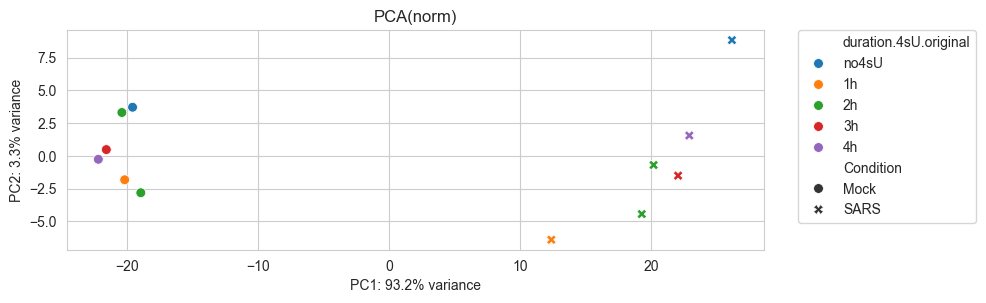

In [61]:
gp.plot_pca(sars, aest={"color": "duration.4sU.original", "shape": "Condition"})

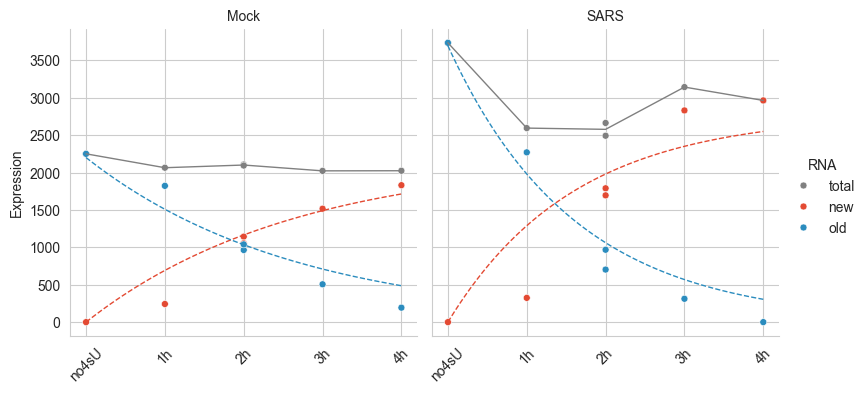

In [62]:
gp.plot_gene_progressive_timecourse(sars, "SMAD3", steady_state={"Mock": True, "SARS": False})

In [63]:
sars = sars.calibrate_effective_labeling_time_kinetic_fit(steady_state={"Mock": True, "SARS": False}, n_top_genes=10)

Optimizing Mock: 167 Iterations [00:17,  9.47 Iterations/s]
Optimizing SARS: 168 Iterations [00:13, 12.23 Iterations/s]


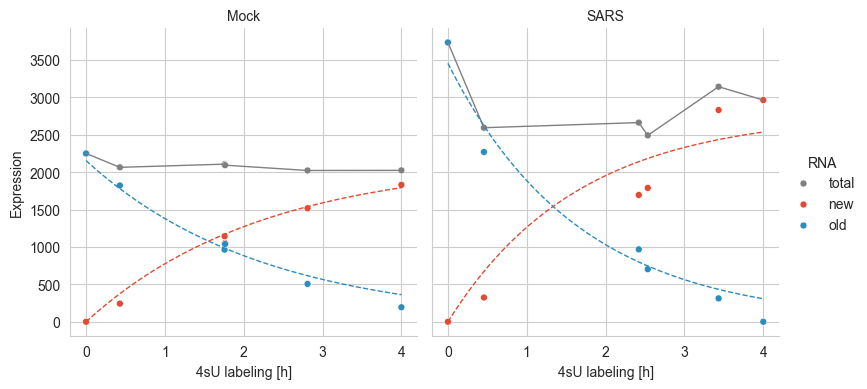

In [64]:
gp.plot_gene_progressive_timecourse(sars, "SMAD3", time="calibrated_time", steady_state={"Mock": True, "SARS": False}, exact_tics=False)

In [65]:
sars = sars.fit_kinetics(time="calibrated_time", steady_state={"Mock": True, "SARS": False})

Fitting SARS: 100%|██████████| 1528/1528 [00:05<00:00, 270.73it/s]


In [66]:
sars.get_analyses(description=True)

{'kinetics_Mock': ['Synthesis', 'Half-life'],
 'kinetics_SARS': ['Synthesis', 'Half-life']}

In [67]:
sars = sars.compute_lfc(contrasts = sars.get_contrasts())
sars.get_analysis_table("total")

,Symbol,Gene,Length,Type,total_Mock vs SARS_LFC,total_Mock vs SARS_M
Symbol,,,,,,
UHMK1,UHMK1,ENSG00000152332,8478,Cellular,0.456179,11460.074087
PABPC4,PABPC4,ENSG00000090621,3592,Cellular,0.106402,15186.855232
CDC42,CDC42,ENSG00000070831,2274,Cellular,0.786432,10116.989779
RCC1,RCC1,ENSG00000180198,2844,Cellular,0.410085,8321.199970
CMPK1,CMPK1,ENSG00000162368,2930,Cellular,0.293634,7438.430396
...,...,...,...,...,...,...
ERBB2,ERBB2,ENSG00000141736,4930,Cellular,-0.217172,330013.817813
GRB7,GRB7,ENSG00000141738,2243,Cellular,-1.001016,73351.708807
FLNA,FLNA,ENSG00000196924,8486,Cellular,0.502213,144596.773096
